In [ ]:
# I lied a little bit when I said this course won't contain ANY data
# This code example contains what we call "synthetic" data
# Synthetic data is useful because it allows us to TEST the behavior of models
# i.e. Do they do what we expect them to do?
# Because we generate the data, we know the "answer"
# With experimental data, we do not
# Why does this section contain such "data", when I said only stats uses data?
# Because LLN + CLT are kind of a "bridge" between probability + stats

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, expon, norm, laplace, binom, geom, \
  multivariate_normal as mvn

In [ ]:
m = 0
v = 1
xvals = norm.rvs(m, v, size=10)
np.mean(xvals)

-0.08291929237523282

In [ ]:
# you'll get a different answer every time!
m = 0
v = 1
xvals = norm.rvs(m, v, size=10)
np.mean(xvals)

0.5458261414966625

In [ ]:
# np.mean() is the same as adding all the values and dividing by N
m = 0
v = 1
xvals = norm.rvs(m, v, size=10)
np.sum(xvals) / len(xvals), np.mean(xvals)

(0.2768936392971499, 0.2768936392971499)

In [ ]:
# what if variance increases?
m = 0
v = 100
xvals = norm.rvs(m, v, size=10)
np.mean(xvals)

25.996041668483826

In [ ]:
# what if you add more samples?
m = 0
v = 100
xvals = norm.rvs(m, v, size=1000000)
np.mean(xvals)

-0.05470622293197185

In [ ]:
# we can also use the LLN to estimate functions of expected values
# this is called the "sample variance"
m = 0
v = 1
xvals = norm.rvs(m, v, size=1000)
m_est = np.mean(xvals)
v_est = np.sum((xvals - m_est)**2)/len(xvals)
print(m_est, v_est)

0.06772817018526879 1.001321974741583


In [ ]:
# EXERCISE: try different distributions' means + variances
# and compare with their theoretical answers from wikipedia

In [ ]:
# 3 ways to compute P(1 <= X <= 2)

m = 0
v = 1
xvals = norm.rvs(m, v, size=1000000)

# what this is doing:
# count = 0
# for x in xvals:
#   if x >= 1 and x <= 2:
#     count += 1
# print(count / len(xvals))

np.mean((xvals >= 1) & (xvals <= 2))

0.135854

In [ ]:
norm.cdf(2) - norm.cdf(1)

0.13590512198327787

In [ ]:
from scipy.integrate import quad

def f(x):
  Z = (2 * np.pi)**0.5
  return np.exp(-x**2 / 2) / Z

quad(f, 1, 2)

(0.13590512198327787, 1.508849955903256e-15)

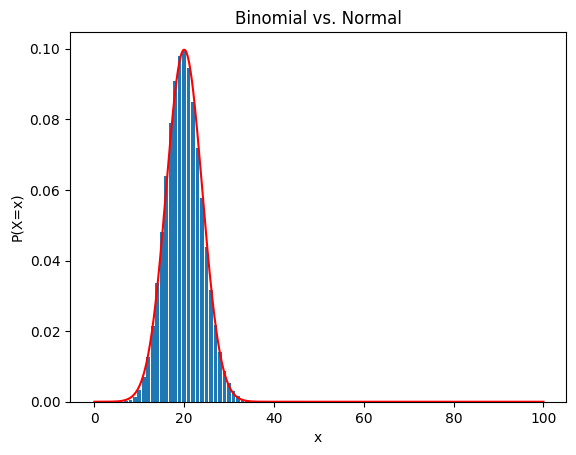

In [ ]:
# CLT - let's compare binomial and normal
n = 100
p = 0.2

xvals = np.arange(100)
yvals = binom.pmf(xvals, n=n, p=p)
plt.bar(xvals, yvals)

m = p * n
v = p * (1-p) * n

xvals2 = np.linspace(0, 100, 1000)
yvals2 = norm.pdf(xvals2, m, v**0.5)
plt.plot(xvals2, yvals2, c='red')

plt.title('Binomial vs. Normal')
plt.ylabel('P(X=x)')
plt.xlabel('x');

theoretical mean: 500.0
theoretical variance: 83.33333333333333
sample mean: 500.0640930633646
sample variance: 83.19161714489954


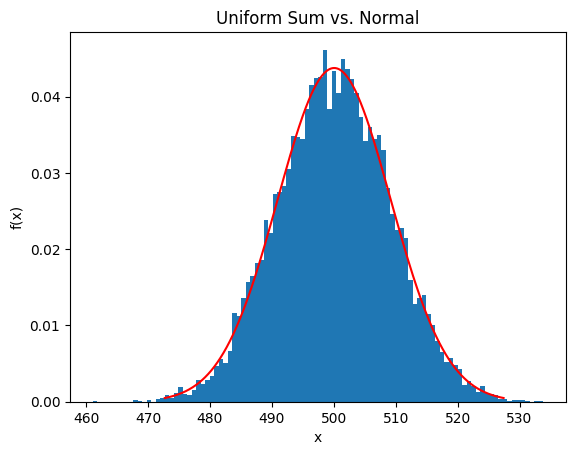

In [ ]:
# CLT - let's compare uniform and normal

# unlike the previous example, this is based on SAMPLES
# not the actual distribution (since we don't know what it is)
N = 1000
M = 10000
samples = np.zeros(M)
for i in range(M):
  sample = uniform.rvs(size=N)
  samples[i] = np.sum(sample)

# theoretical mean of U(a, b) = 0.5 (a + b)
# theroetical mean of sum = 0.5 * N
# theroetical variance of U(a, b) = (1/12) * (b - a)^2
# theoretical variance of sum = (1/12) * N

print("theoretical mean:", 0.5 * N)
print("theoretical variance:", (1/12) * N)

m = np.mean(samples)
v = np.var(samples) #np.sum((samples - m)**2)/len(samples)
s = np.std(samples) #v**0.5

print("sample mean:", m)
print("sample variance:", v)

# instead of plotting the TRUE distribution of U_1 + U_2 + ... + U_N
# let's plot the histogram (approximate distribution)
# we set density=True so it's normalized (otherwise, it shows counts)
plt.hist(samples, bins=100, density=True)

xvals = np.linspace(m - 3 * s, m + 3 * s, 10000)
yvals = norm.pdf(xvals, m, s)
plt.plot(xvals, yvals, c='red')

plt.title('Uniform Sum vs. Normal')
plt.ylabel('f(x)')
plt.xlabel('x');

sample mean: 3332.5238
sample variance: 7853.168433559998


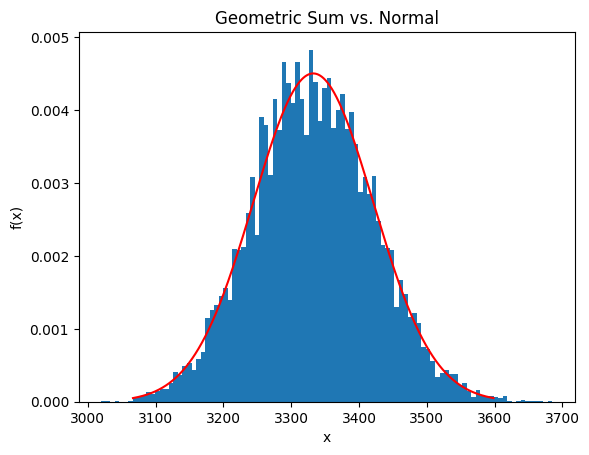

In [ ]:
# what about another discrete distribution?

N = 1000
M = 10000
samples = np.zeros(M)
for i in range(M):
  sample = geom.rvs(size=N, p=0.3)
  samples[i] = np.sum(sample)

m = np.mean(samples)
v = np.var(samples) #np.sum((samples - m)**2)/len(samples)
s = np.std(samples) #v**0.5

print("sample mean:", m)
print("sample variance:", v)

plt.hist(samples, bins=100, density=True)

xvals = np.linspace(m - 3 * s, m + 3 * s, 10000)
yvals = norm.pdf(xvals, m, s)
plt.plot(xvals, yvals, c='red')

plt.title('Geometric Sum vs. Normal')
plt.ylabel('f(x)')
plt.xlabel('x');

![](https://deeplearningcourses.com/notebooks_v3_pxl?sc=L5rVabHObBsRpryYTp-FxQ&n=LLN+%2B+CLT)